In [160]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [161]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/store-complaints/Store_Complaints (2).csv
/kaggle/input/store-complaints/Store_Complaints.csv


In [162]:
path = "/kaggle/input/store-complaints/Store_Complaints (2).csv"
data = pd.read_csv(path)

In [163]:
data.head(3)

,Complaint ID,Customer Name,Complaint Type,Staff Name,Department,Product Details,Date of Complaint,Store Location
0,1,John Smith,Product,Sarah Johnson,Grocery,Expired milk,2023-06-21,SuperMart
1,2,Emily Davis,Delivery,Mike Anderson,Logistics,Late delivery,2023-08-11,MegaMart
2,3,Mark Wilson,Staff,Jessica Roberts,Customer Service,Rude behavior,2024-03-12,HyperMart


In [164]:
data.tail(3)

,Complaint ID,Customer Name,Complaint Type,Staff Name,Department,Product Details,Date of Complaint,Store Location
297,298,Emma Adams,Delivery,David Harris,Bakery,Stale bread,2023-07-12,SuperMart
298,299,Chloe Brown,Staff,Mike Anderson,Logistics,Lost package,2023-12-27,MegaMart
299,300,Liam Davis,Product,Emily Davis,Customer Service,Impolite behavior,2023-12-30,HyperMart


In [165]:
data.isnull().sum()

Complaint ID         0
Customer Name        0
Complaint Type       0
Staff Name           0
Department           0
Product Details      0
Date of Complaint    0
Store Location       0
dtype: int64

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Complaint ID       300 non-null    int64 
 1   Customer Name      300 non-null    object
 2   Complaint Type     300 non-null    object
 3   Staff Name         300 non-null    object
 4   Department         300 non-null    object
 5   Product Details    300 non-null    object
 6   Date of Complaint  300 non-null    object
 7   Store Location     300 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.9+ KB


In [167]:
data.describe()

,Complaint ID
count,300.000000
mean,150.500000
std,86.746758
min,1.000000
25%,75.750000
50%,150.500000
75%,225.250000
max,300.000000


In [168]:
data.columns

Index(['Complaint ID', 'Customer Name', 'Complaint Type', 'Staff Name',
       'Department', 'Product Details', 'Date of Complaint', 'Store Location'],
      dtype='object')

## Complaint Types

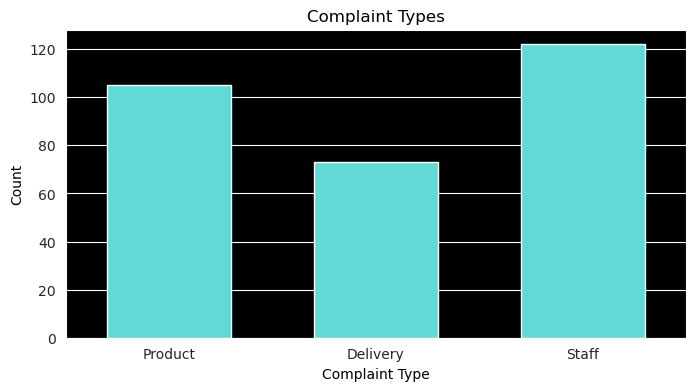

In [185]:
sns.set_style('darkgrid')
plt.rcParams['axes.facecolor'] = 'black'

# Define custom neon color
neon_color = "#4deeea"

# Bar plot of complaint types with custom color
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Complaint Type', color=neon_color, width=0.6)
plt.title('Complaint Types', color='Black')
plt.xlabel('Complaint Type', color='black')
plt.ylabel('Count', color='black')
plt.show()


## Complaint Types Distribution

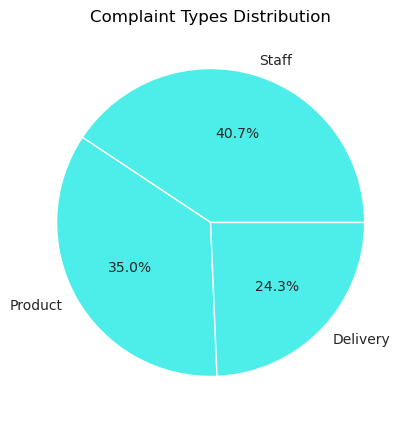

In [184]:
# Pie chart of complaint types distribution
plt.figure(figsize=(5, 5))
complaint_counts = data['Complaint Type'].value_counts()
plt.pie(complaint_counts, labels=complaint_counts.index, colors=[neon_color]*len(complaint_counts), autopct='%1.1f%%')
plt.title('Complaint Types Distribution', color='Black')
plt.show()

## Complaints Over Time

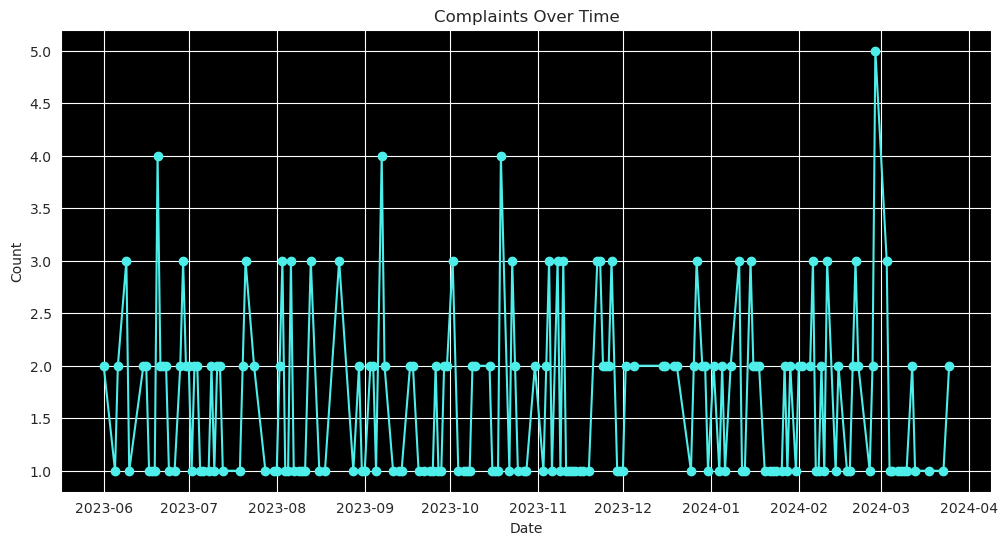

In [176]:
plt.figure(figsize=(12, 6))
data['Date of Complaint'] = pd.to_datetime(data['Date of Complaint'], format='%Y/%m/%d')
complaints_over_time = data.groupby(data['Date of Complaint']).size()
plt.plot(complaints_over_time, marker='o', color='#4deeea')  # Custom neon color
plt.title('Complaints Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


## Complaints by Department

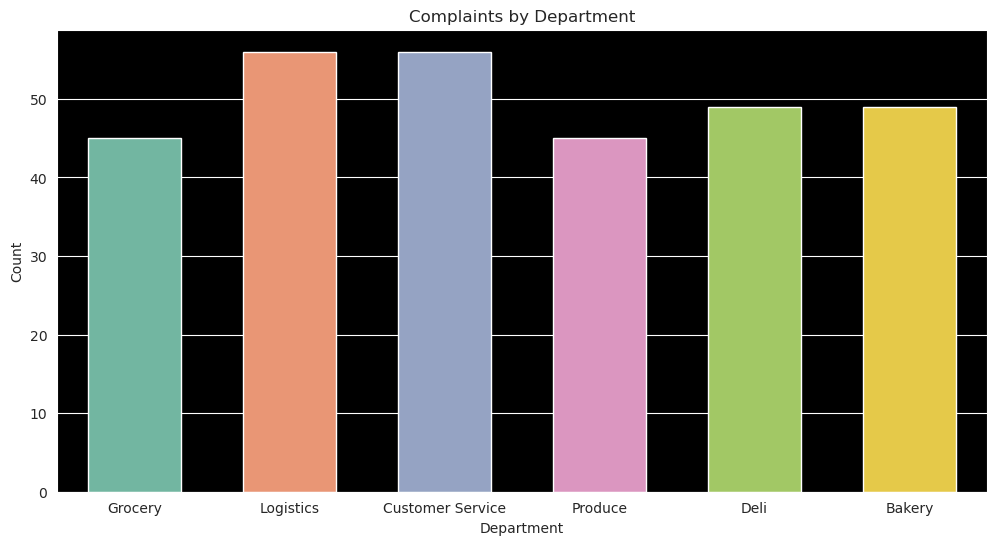

In [177]:
plt.rcParams['axes.facecolor'] = 'Black'

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Department', palette='Set2', width=0.6)
plt.title('Complaints by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

## Complaints by Product Details worldCloud

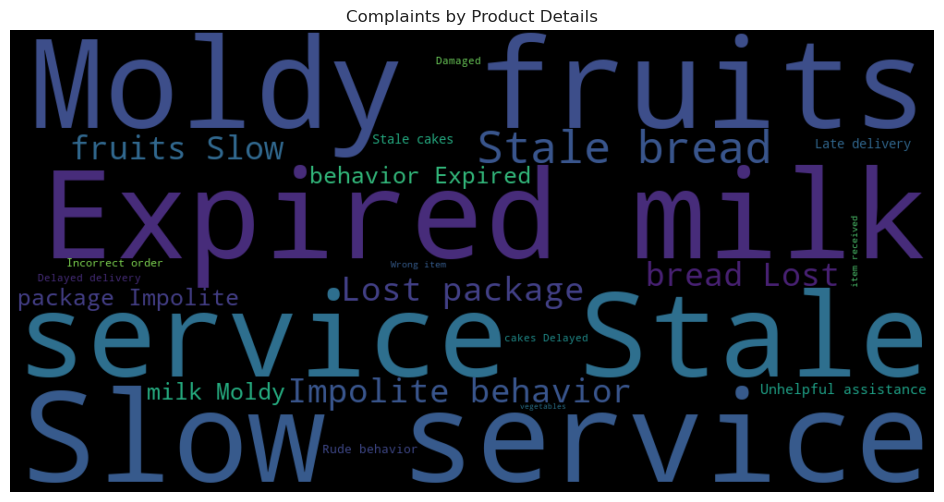

In [178]:
from wordcloud import WordCloud

plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(' '.join(data['Product Details']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Complaints by Product Details')
plt.axis('off')
plt.show()

## Complaints by Store Location and Complaint Type

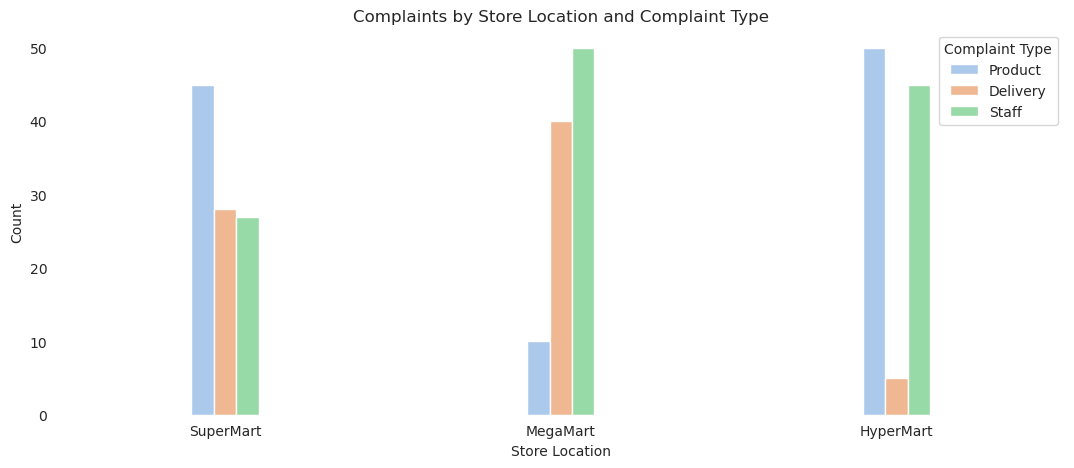

In [179]:
sns.set_style('darkgrid')
plt.rcParams['axes.facecolor'] = 'white'

plt.figure(figsize=(13, 5))
sns.countplot(data=data, x='Store Location', hue='Complaint Type', palette='pastel',width=0.2)
plt.title('Complaints by Store Location and Complaint Type')
plt.xlabel('Store Location')
plt.ylabel('Count')
plt.legend(title='Complaint Type')
plt.show()

## Heatmap of Complaint Frequency by Month and Department

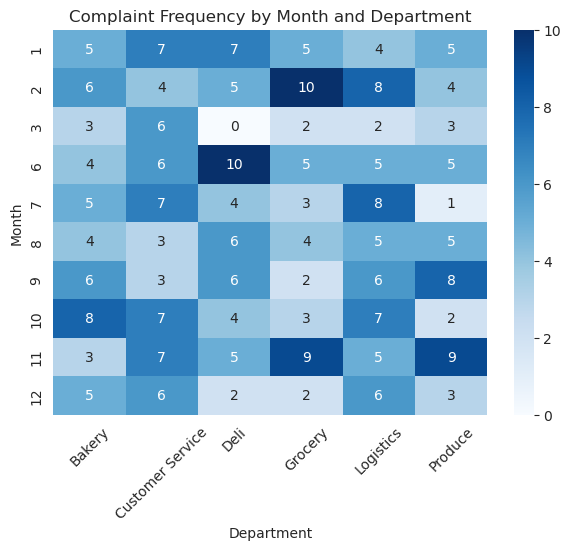

In [183]:
plt.figure(figsize=(7, 5))
complaints_month_dept = data.groupby([data['Date of Complaint'].dt.month, 'Department']).size().unstack(fill_value=0)
sns.heatmap(complaints_month_dept, cmap='Blues', annot=True, fmt='d')
plt.title('Complaint Frequency by Month and Department')
plt.xlabel('Department')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.show()